# **IMPORT LIBRARIES**

In [3]:
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,confusion_matrix,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from seaborn import pairplot,heatmap
from sklearn.metrics import r2_score



## **READ DATASET**

In [33]:
dataFrame=pd.read_csv('/content/Copy of NYC Taxi Data.csv')
data=dataFrame.copy()
dataFrame.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0
...,...,...,...,...,...,...,...,...,...,...,...
327863,id1713296,1,2016-04-14 08:36:43,2016-04-14 09:01:00,2.0,-73.997131,40.736652,-74.007042,40.707638,N,1457.0
327864,id0109519,2,2016-06-03 01:22:36,2016-06-03 01:38:11,1.0,-74.004440,40.719841,-73.969597,40.761040,N,935.0
327865,id0639610,2,2016-06-02 16:53:31,2016-06-02 16:59:31,1.0,-73.995293,40.739479,-73.991783,40.747059,N,360.0
327866,id0354700,1,2016-05-02 23:19:08,2016-05-02 23:25:31,1.0,-73.942329,40.806435,-73.944305,40.788155,N,383.0


## **DATA VISUALIZATION // CORELATION**

<ipython-input-5-71d8f3149ce0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

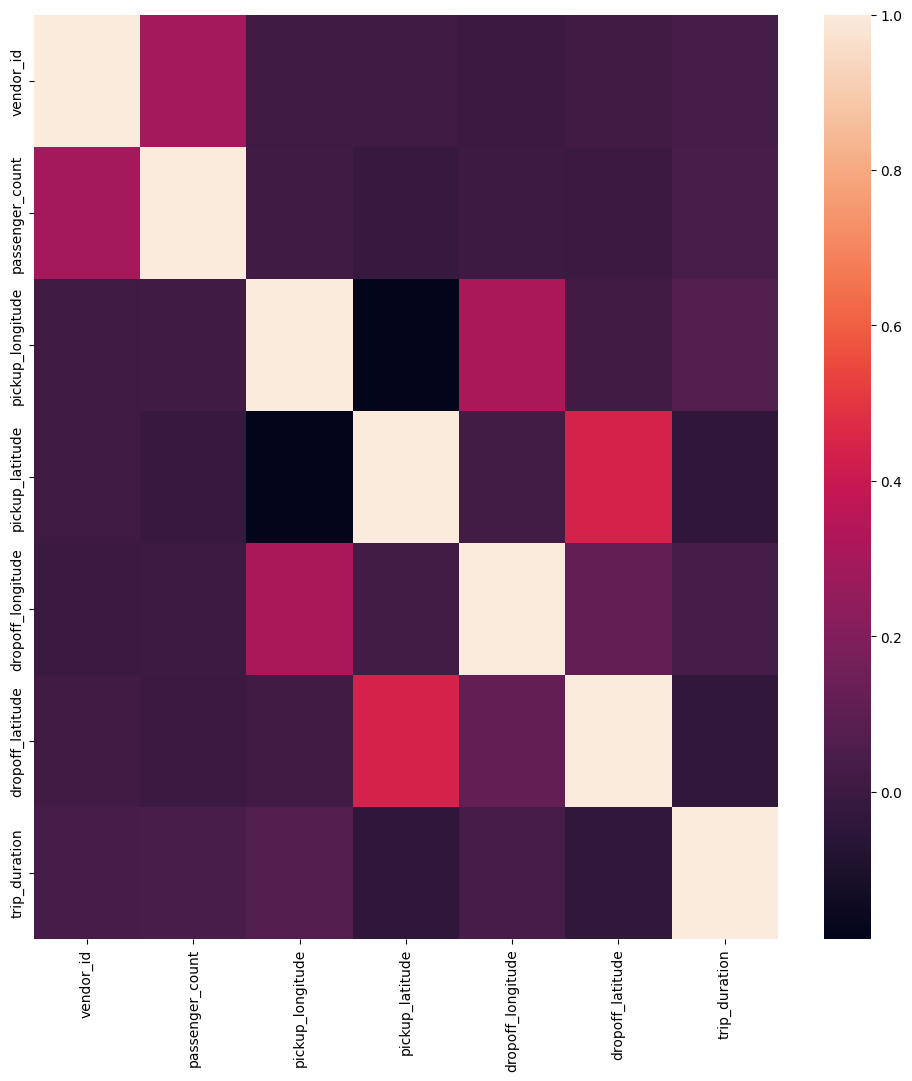

In [5]:
corr=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr)

<Figure size 1200x1200 with 0 Axes>

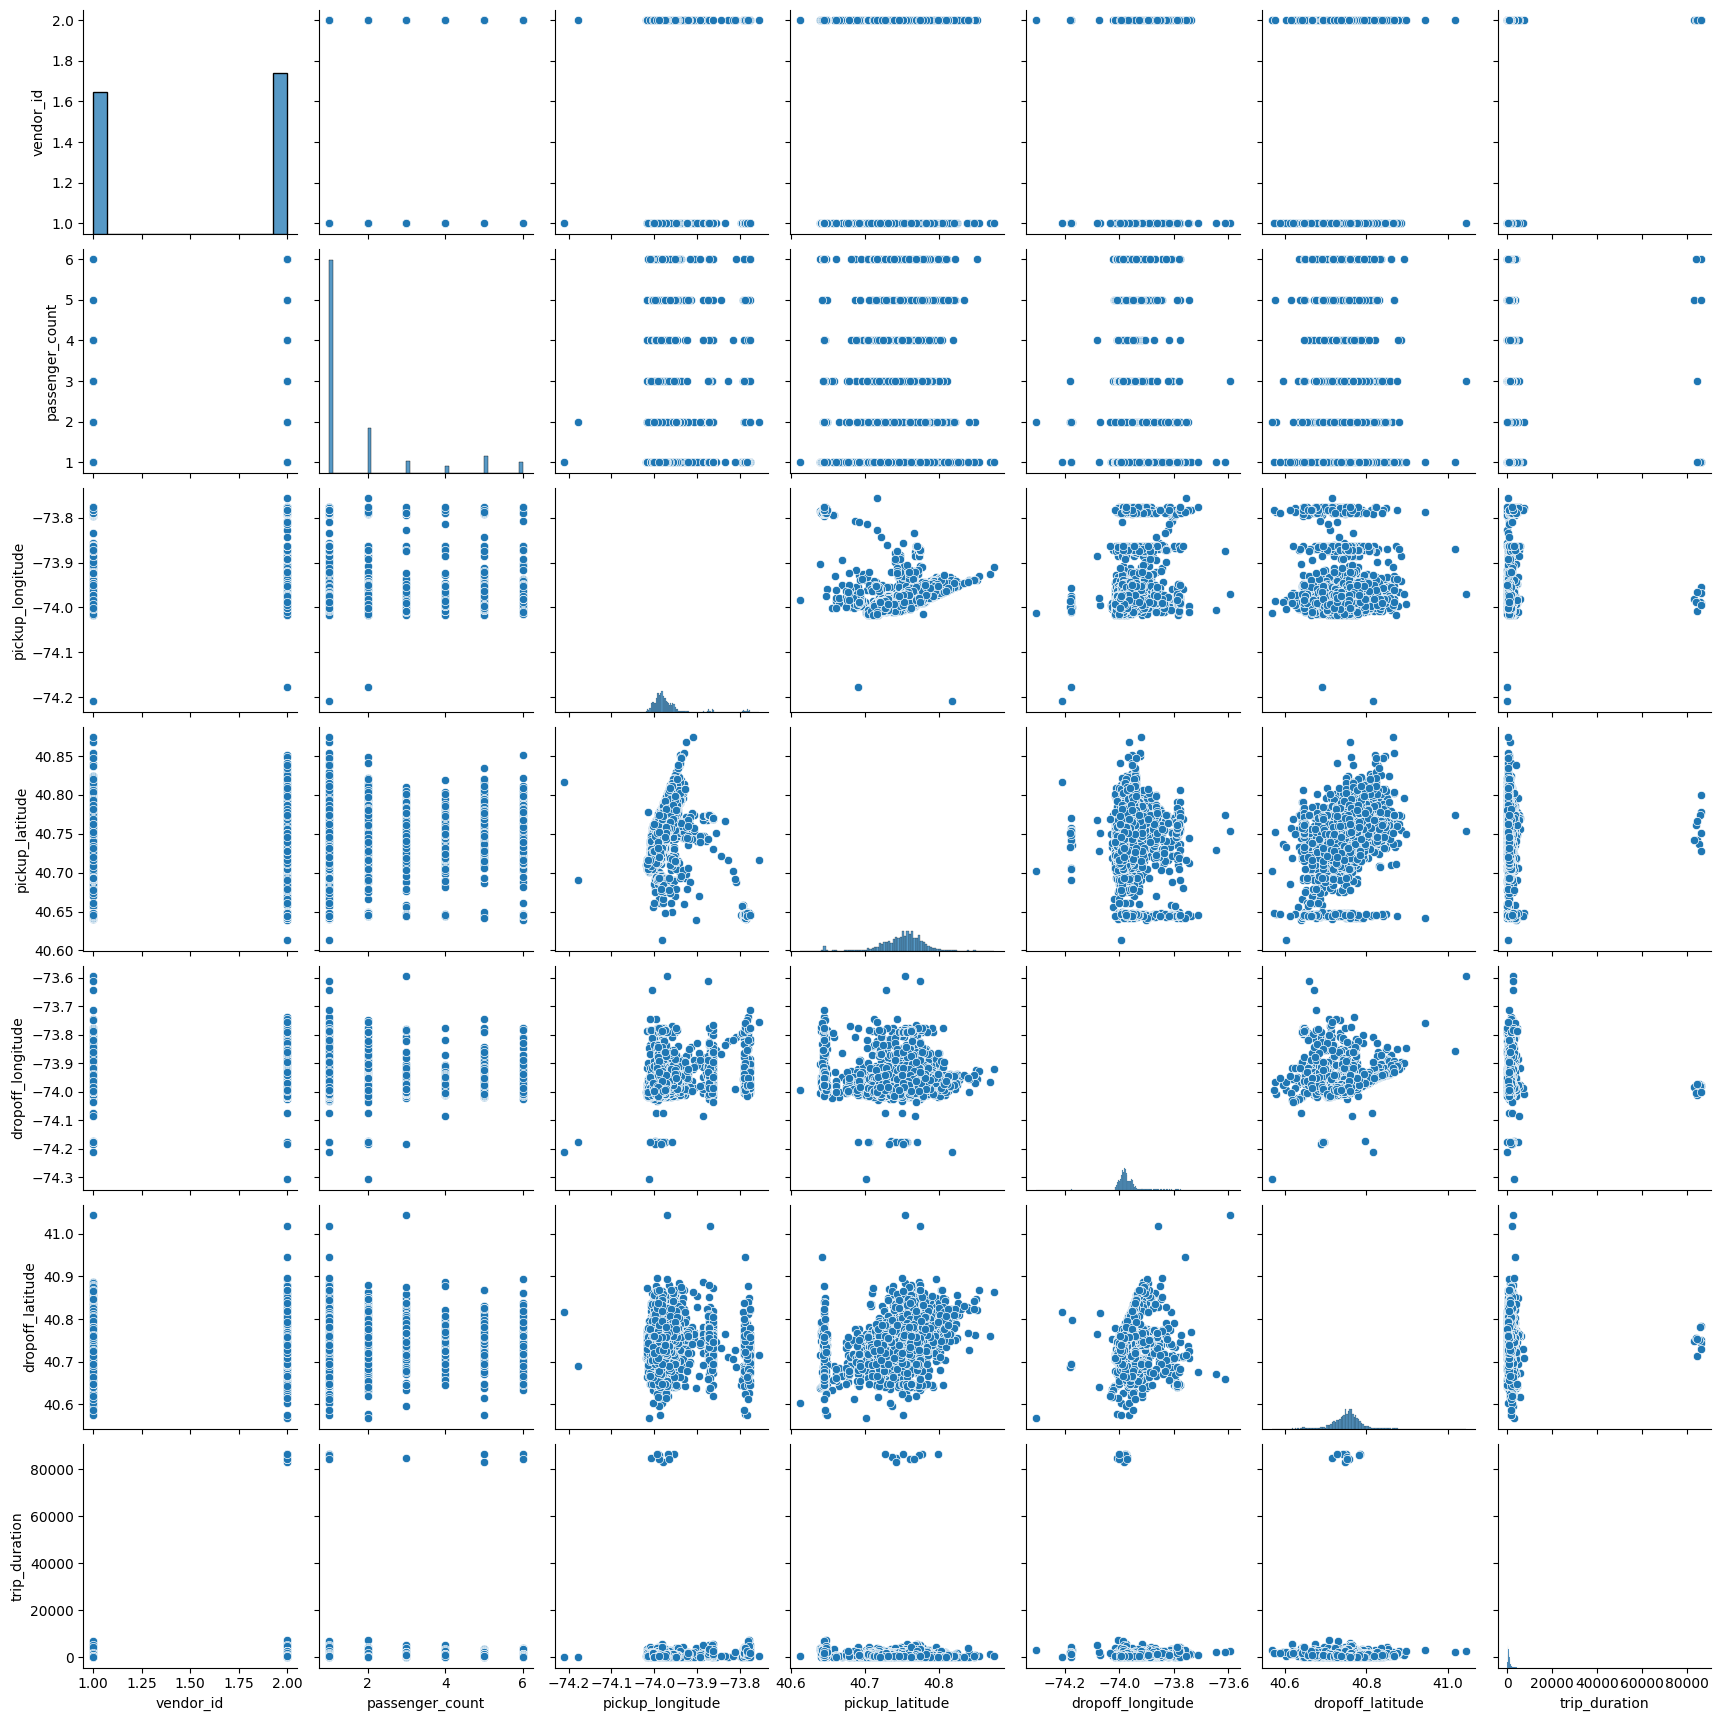

In [6]:
plt.figure(figsize=(12,12))
sns.pairplot(data)


In [7]:
dataFrame.drop(['id','pickup_datetime','dropoff_datetime',],inplace=True,axis=1)
dataFrame['store_and_fwd_flag']=data['store_and_fwd_flag'].replace({'N':0,'Y':1})
dataFrame.fillna(data.mean(),inplace=True)
x=dataFrame[['pickup_longitude',	'pickup_latitude',	'dropoff_longitude',	'dropoff_latitude']]
y=dataFrame[['trip_duration']]
z=x.to_numpy()



<ipython-input-7-f7308fb1bab2>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.fillna(data.mean(),inplace=True)


In [8]:
def distance(lat1, lat2, lon1, lon2):

    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

    c = 2 * asin(sqrt(a))

    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371

    # calculate the result
    return(c * r)


In [9]:
k=[]
for a,b,c,d in z:
    k.append(round(distance(b,d,a,c),2))
k=np.array(k)
y=dataFrame['trip_duration']

In [10]:
k=k.reshape(-1,1)
l=k.copy()
scaler=StandardScaler()
k=scaler.fit_transform(k)

In [11]:
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(k,y,test_size=0.2)
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

## **DATA VISUALIZATION**

**VENDOR ID ANALYSIS**

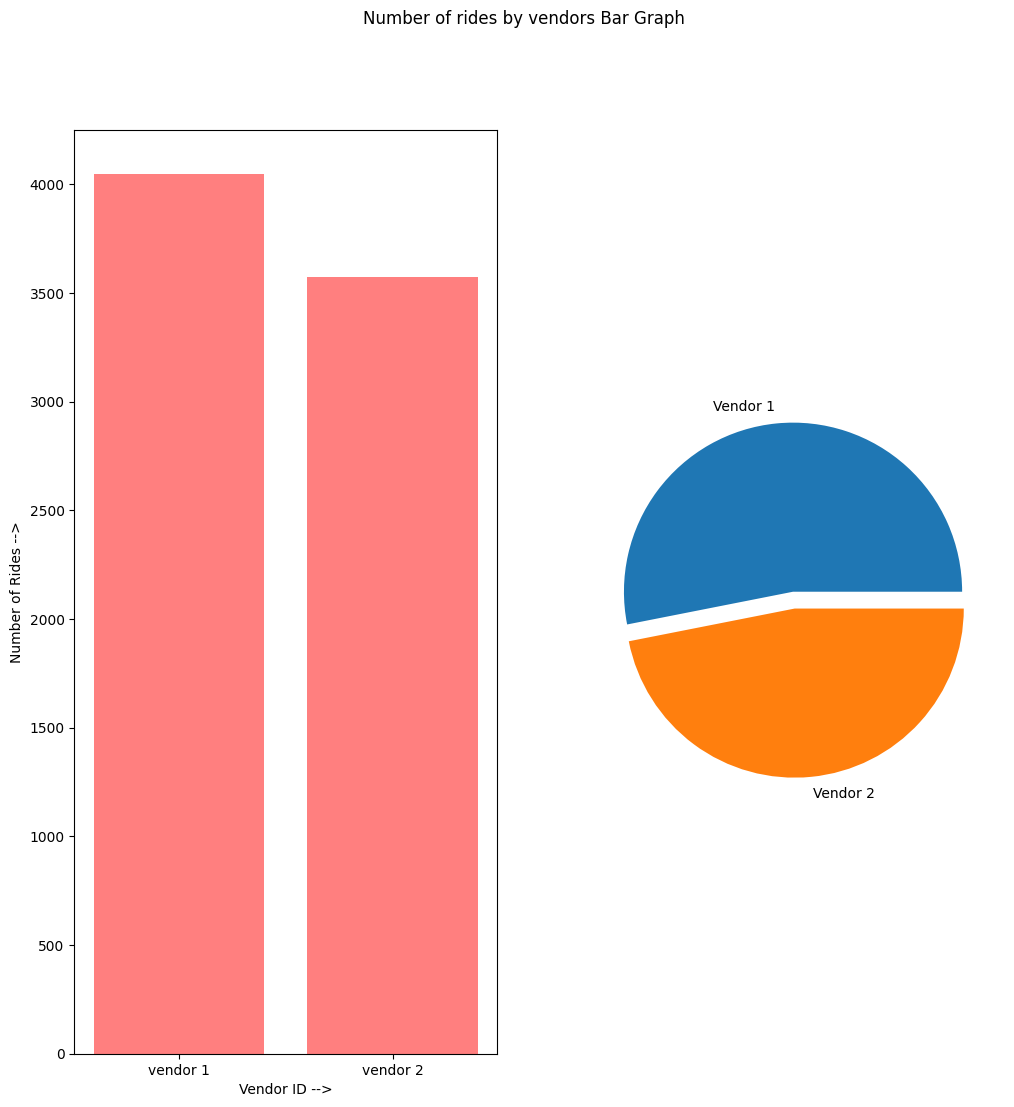

In [12]:
vendor_count=data['vendor_id'].value_counts()
vendor_unique=data['vendor_id'].unique()
vendor_count.to_numpy()
vendor_count=vendor_count
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.bar(['vendor 1','vendor 2'],vendor_count,alpha=0.5,color='red')
plt.suptitle('Number of rides by vendors Bar Graph')
plt.xlabel('Vendor ID -->')
plt.ylabel('Number of Rides -->')
plt.subplot(1,2,2)
plt.pie(vendor_count,explode=(0,0.1), labels=['Vendor 1','Vendor 2'])
plt.show()


**PASSENGER COUNT**

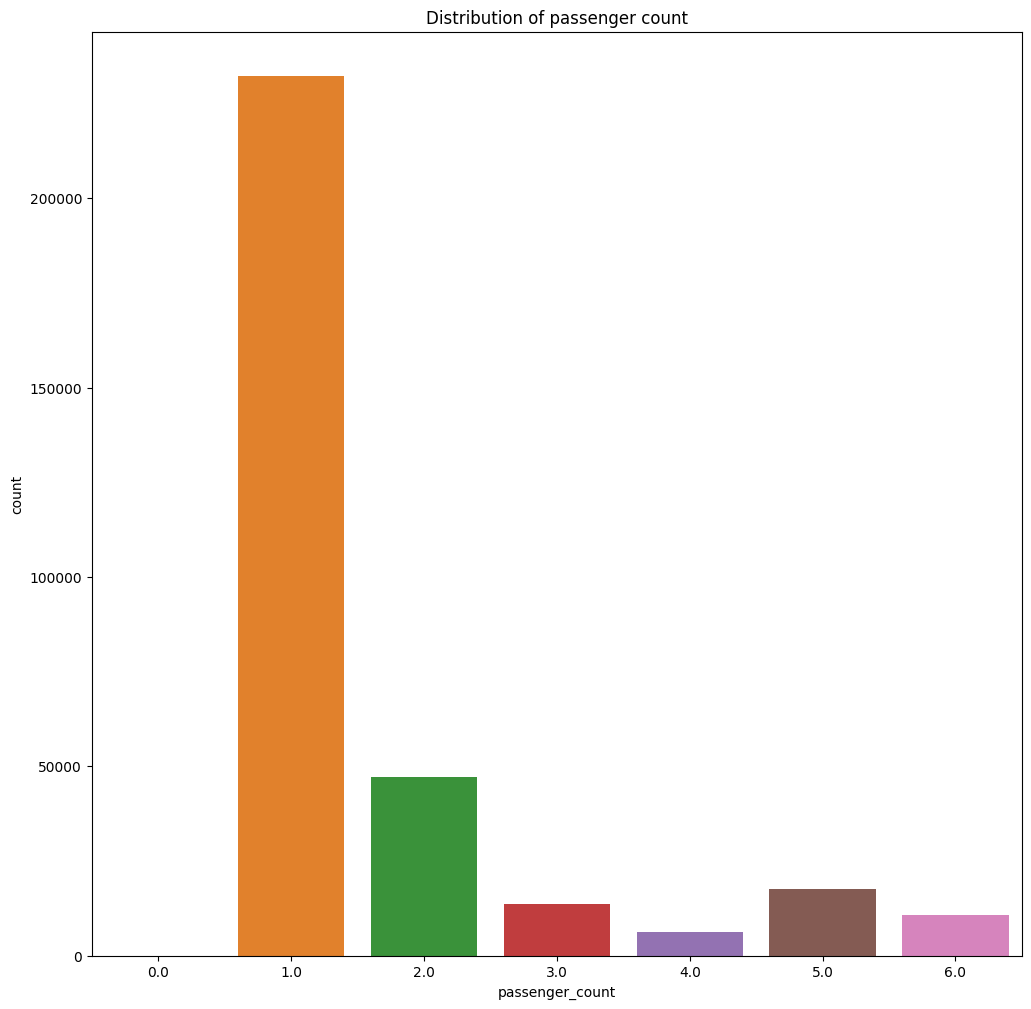

In [38]:
plt.figure(figsize=(12,12))
sns.countplot(x=data["passenger_count"])
plt.title('Distribution of passenger count')
plt.show()

**STORE AND FORWARD FLAG**

Text(0.5, 1.0, 'Store and Forward Flag')

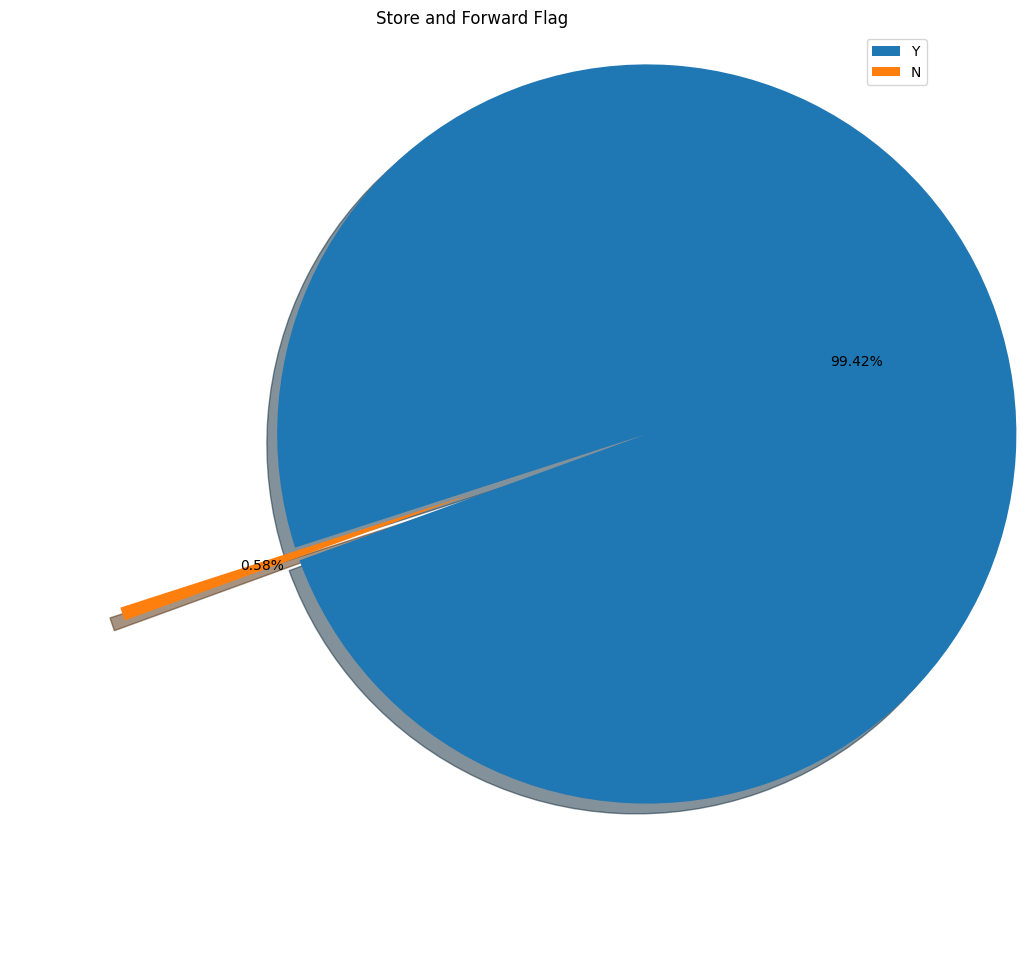

In [39]:
plt.figure(figsize=(12,12))
plt.pie(data['store_and_fwd_flag'].value_counts(),shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")


**MONTH**

<Axes: xlabel='pickup_datetime', ylabel='count'>

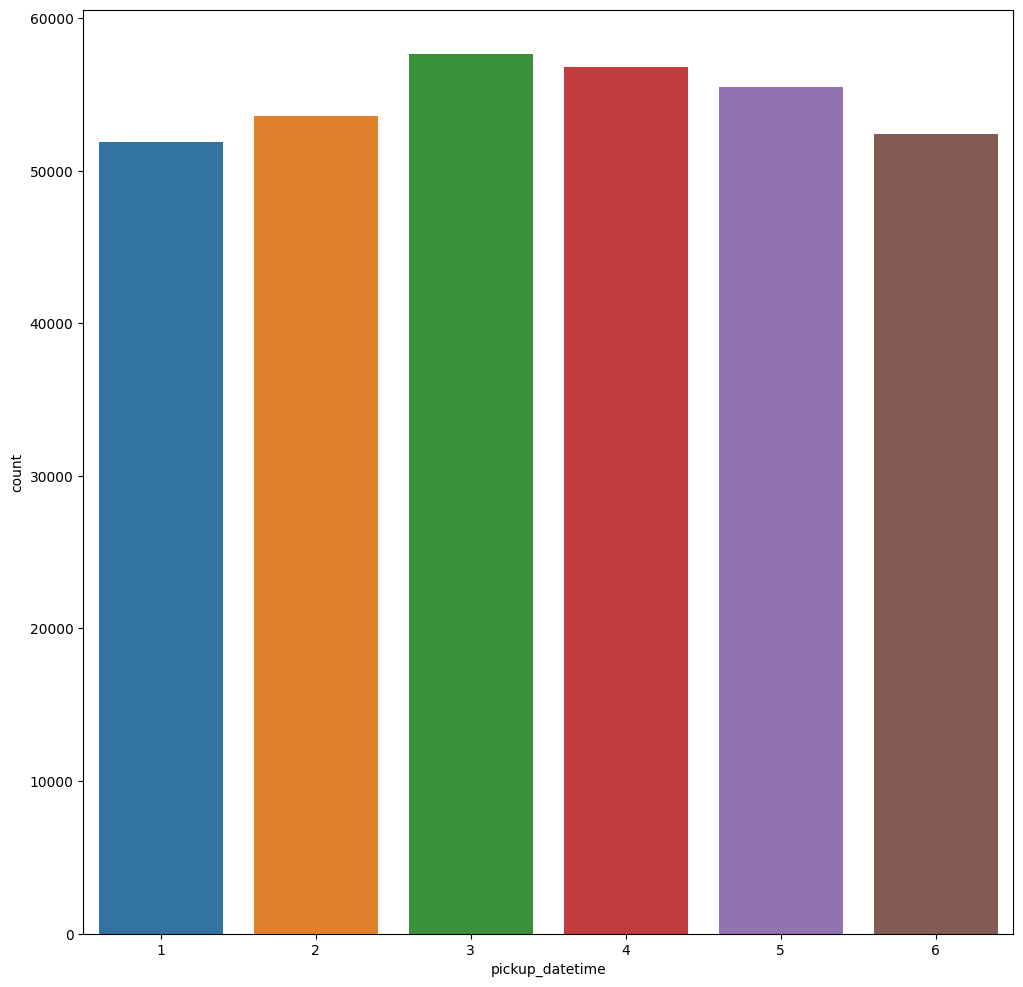

In [40]:
month=pd.to_datetime(dataFrame['pickup_datetime'])
months=month.dt.month
plt.figure(figsize=(12,12))
sns.countplot(x=months)

**DAY**

<Axes: xlabel='pickup_datetime', ylabel='count'>

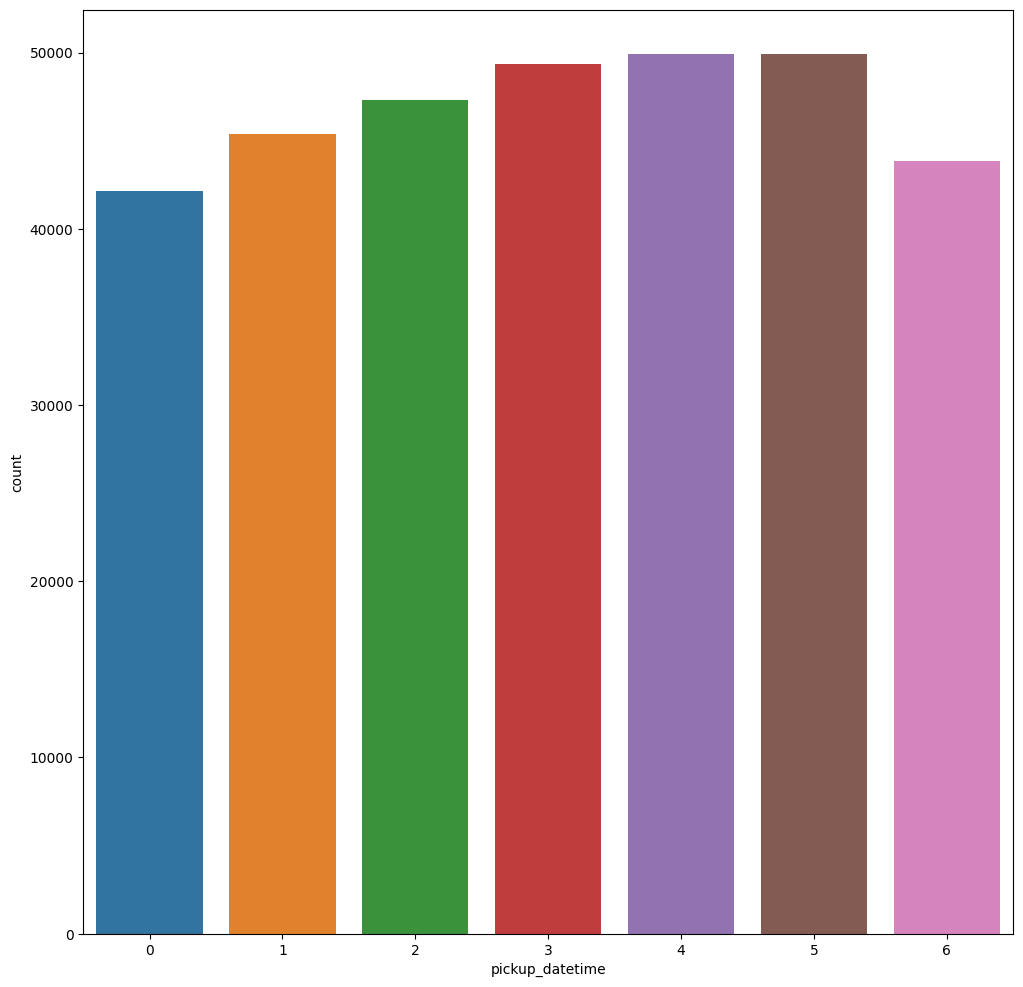

In [48]:
plt.figure(figsize=(12,12))
days=pd.to_datetime(dataFrame['pickup_datetime'])
day=days.dt.day_of_week
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.countplot(x=day,)

## **ML ALGO**

In [15]:
rf=RandomForestRegressor()
ml=rf.fit(x_train,y_train)
z=rf.predict(x_test)
y_test=y_test.reshape(len(y_test))
z=z.reshape(len(y_test))

<ipython-input-15-7eb478787a7b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ml=rf.fit(x_train,y_train)


## **DATA VISUALIZATION - COMPARISON**




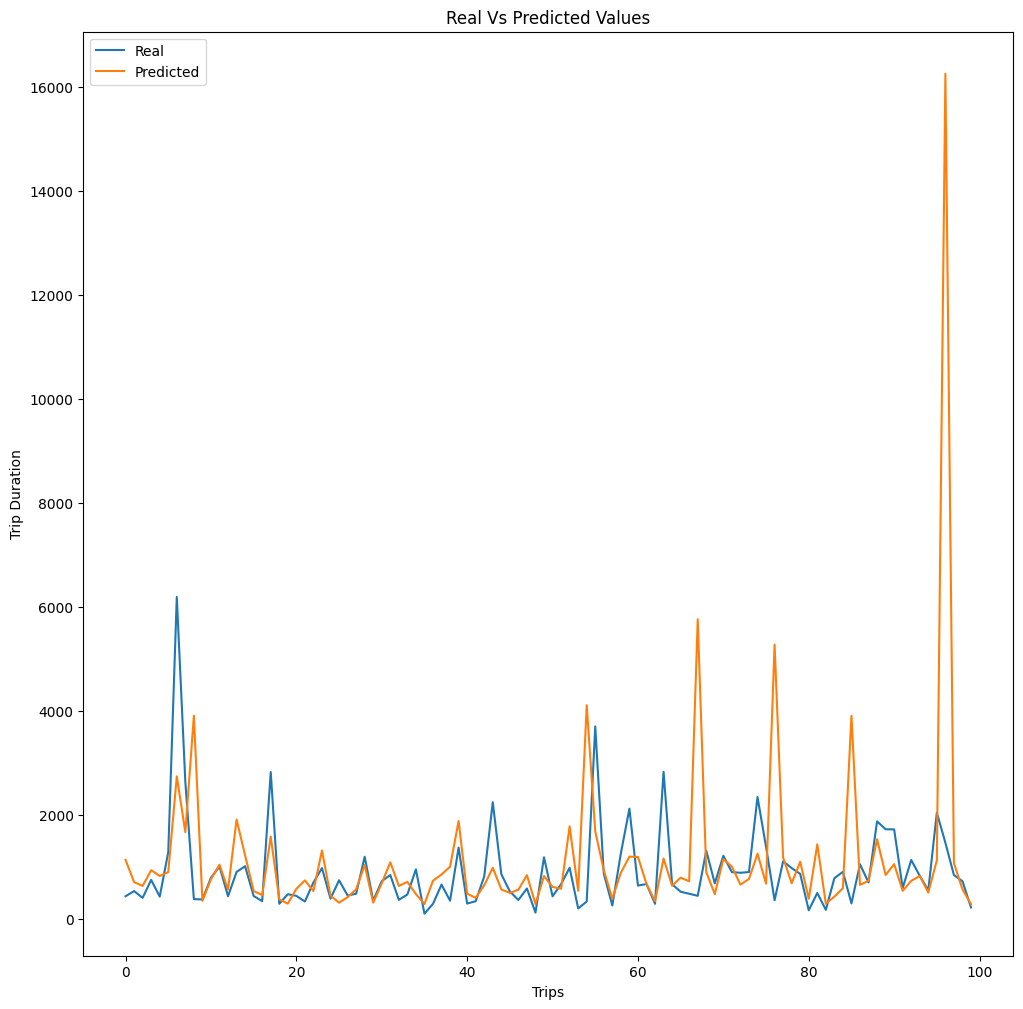

In [16]:
plt.figure(figsize=(12,12))
plt.plot(y_test[:100])
plt.plot(z[:100])
plt.title('Real Vs Predicted Values')
plt.xlabel('Trips')
plt.ylabel('Trip Duration')
plt.legend(['Real','Predicted'])
plt.show()


**ML METRICS**

In [19]:
print('Mean Squared Error Is :- ',mean_squared_error(y_test,z))
print('R2 Score :-             ',r2_score(y_test,z))

Mean Squared Error Is :-  1075275.8160866224
R2 Score :-              -1.9028917062949984
